## How well can we fit oscillations with MCMC

Or do we need nested sampling or something similar:

http://journals.plos.org/plosone/article?id=10.1371%2Fjournal.pone.0088419

### Start with the Goodwin Model

In [37]:
from pyndamics import Simulation
from pyndamics.emcee import *
from numpy import array

### Make the Data

In [38]:
from numpy.random import randint,randn
from numpy import array

In [39]:
sim=Simulation()
sim.add("M'=1/(1+E)-alpha",1,plot=False)
sim.add("E'=M-beta",1,plot=False)
sim.params(alpha=.4,beta=0.04)
sim.run(0,50)

In [40]:
L=len(sim.t)
N=30
idx=randint(0,L,N)
idx=sorted(idx)
tt=array(sim.t[idx])
MM=array(sim.M[idx])+randn(N)*.1*(max(sim.M)-min(sim.M))
tt,MM

(array([  1.35135135,   5.00500501,   8.45845846,   8.90890891,
         15.86586587,  16.56656657,  18.36836837,  21.82182182,
         22.97297297,  23.57357357,  23.87387387,  24.47447447,
         25.22522523,  27.22722723,  30.08008008,  31.63163163,
         31.78178178,  31.88188188,  32.38238238,  36.73673674,
         40.34034034,  40.69069069,  40.84084084,  43.79379379,
         45.4954955 ,  45.7957958 ,  45.94594595,  47.8978979 ,
         48.84884885,  49.6996997 ]),
 array([ 0.57970086,  0.30331461, -0.55875608, -0.31053258,  1.04190441,
         0.9185557 ,  0.96073139,  0.11191419, -0.12530437,  0.12751724,
        -0.24161459, -0.48839459, -0.70528825, -0.73691075, -0.06657937,
         0.22050469,  0.84036264,  0.91064431,  1.081696  ,  0.49934732,
        -0.6411502 , -0.65006557, -0.08225973, -1.00570073, -1.19517454,
        -0.99421748, -1.03751145,  0.43444825,  1.21791391,  1.01650478]))

## Run the Sim

In [41]:
#  some data
t_data,M_data=(array([  0.45045045,   2.85285285,   4.3043043 ,   4.5045045 ,
          5.60560561,   9.20920921,  12.96296296,  13.51351351,
         18.21821822,  22.22222222,  22.37237237,  24.97497497,
         25.77577578,  26.02602603,  28.42842843,  30.48048048,
         33.23323323,  36.48648649,  39.13913914,  39.63963964,
         39.98998999,  41.99199199,  43.24324324,  44.24424424,
         44.54454454,  46.3963964 ,  46.996997  ,  47.2972973 ,
         48.14814815,  48.74874875]),
 array([ 1.14606519,  0.78658793,  0.15507708,  0.64491796,  0.3834882 ,
        -0.65511548, -0.89478528, -0.24951861,  1.06321321, -0.04609502,
         0.34452878, -0.18088143, -0.44538382, -0.72407121, -1.16075082,
        -0.45408912,  0.95732637,  0.83271397,  0.20881338, -0.03971536,
        -0.1518789 , -0.78984006, -0.83559018, -1.32878715, -0.99501354,
        -0.74628129, -0.24701692, -0.03410385,  0.95727806,  1.07165818]))

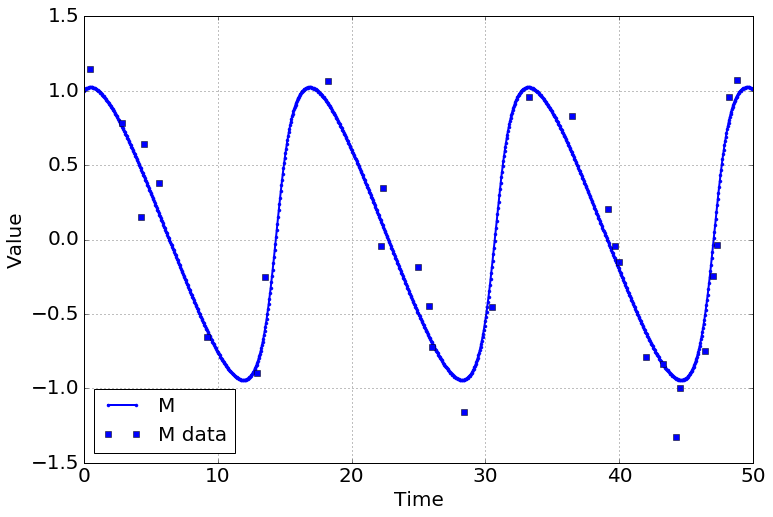

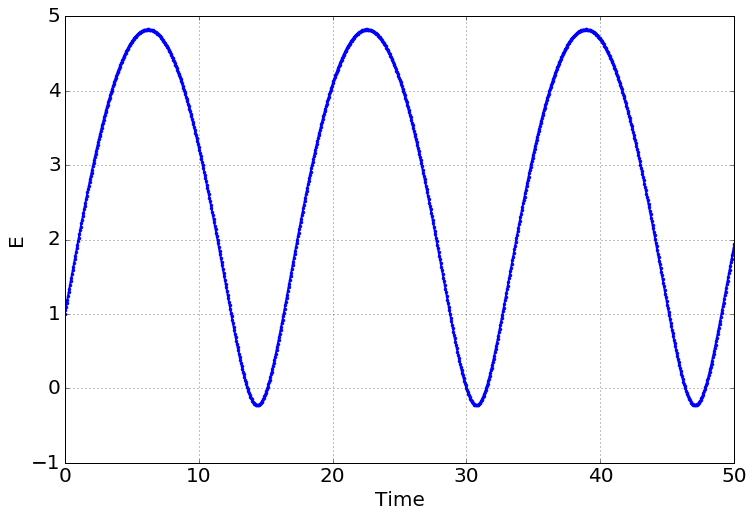

In [43]:
sim=Simulation()
sim.add("M'=1/(1+E)-alpha",1,plot=True)
sim.add("E'=M-beta",1,plot=True)
sim.add_data(t=t_data,M=M_data,plot=True)
sim.params(alpha=.4,beta=0.04)
sim.run(0,50)

In [45]:
model=MCMCModel(sim,
                alpha=Uniform(0,5),
                beta=Uniform(0,5))
model.run_mcmc(500)

Sampling Prior...
Done.
0.25 s
Running MCMC...
Done.
2 m, 24.49 s


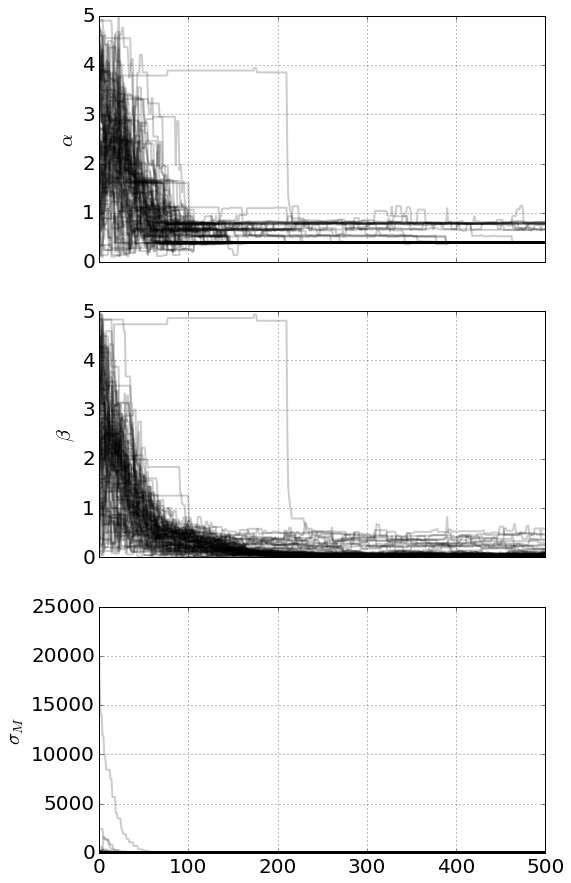

In [46]:
model.plot_chains()

Running MCMC...
Done.
1 m, 18.63 s


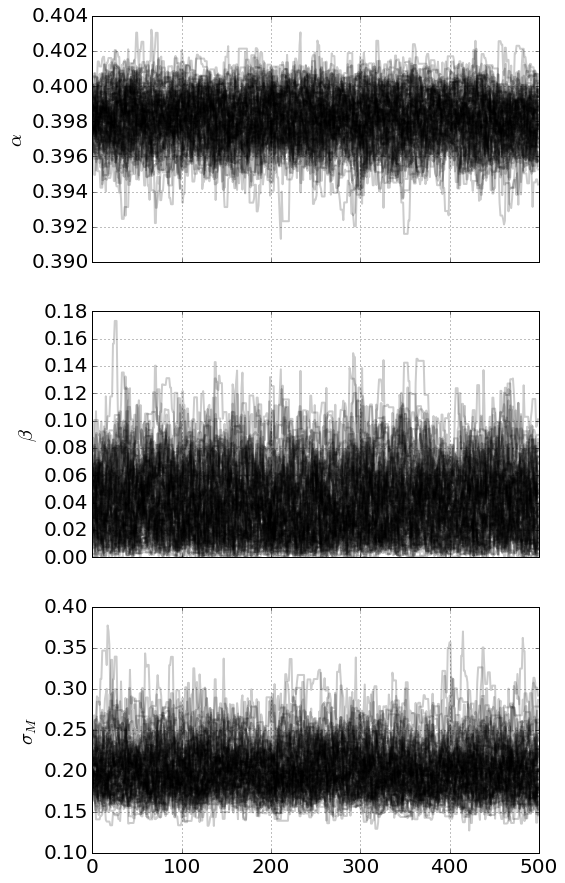

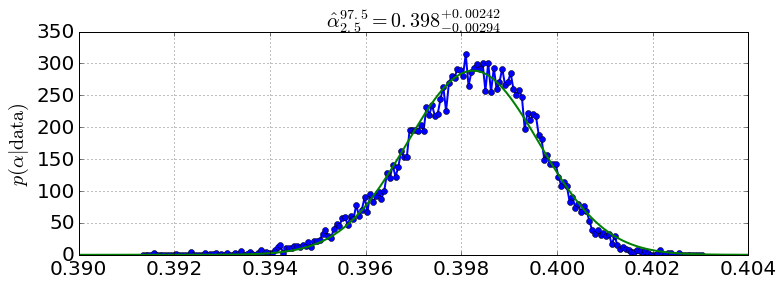

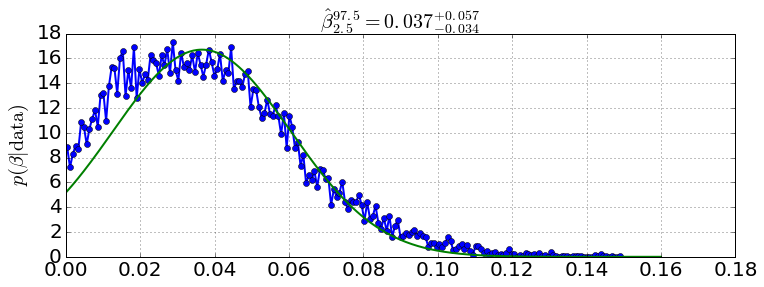

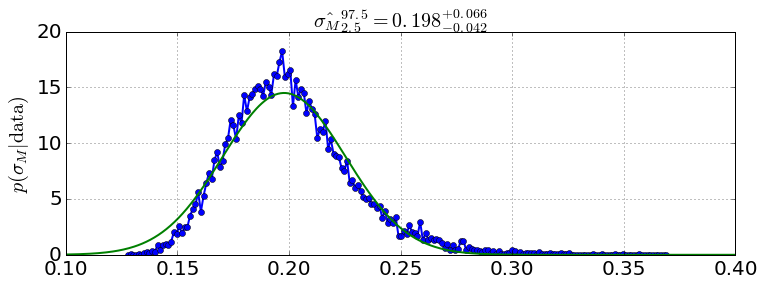

In [49]:
model.set_initial_values('samples')
model.run_mcmc(500)
model.plot_chains()
model.plot_distributions()

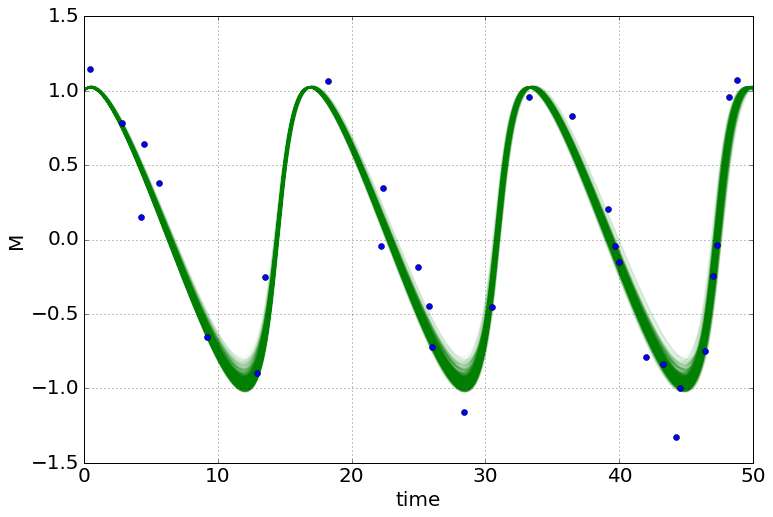

In [50]:
model.plot_many(0,50,'M')

## With initial values

Sampling Prior...
Done.
0.36 s
Running MCMC...
Done.
1 m, 57.67 s


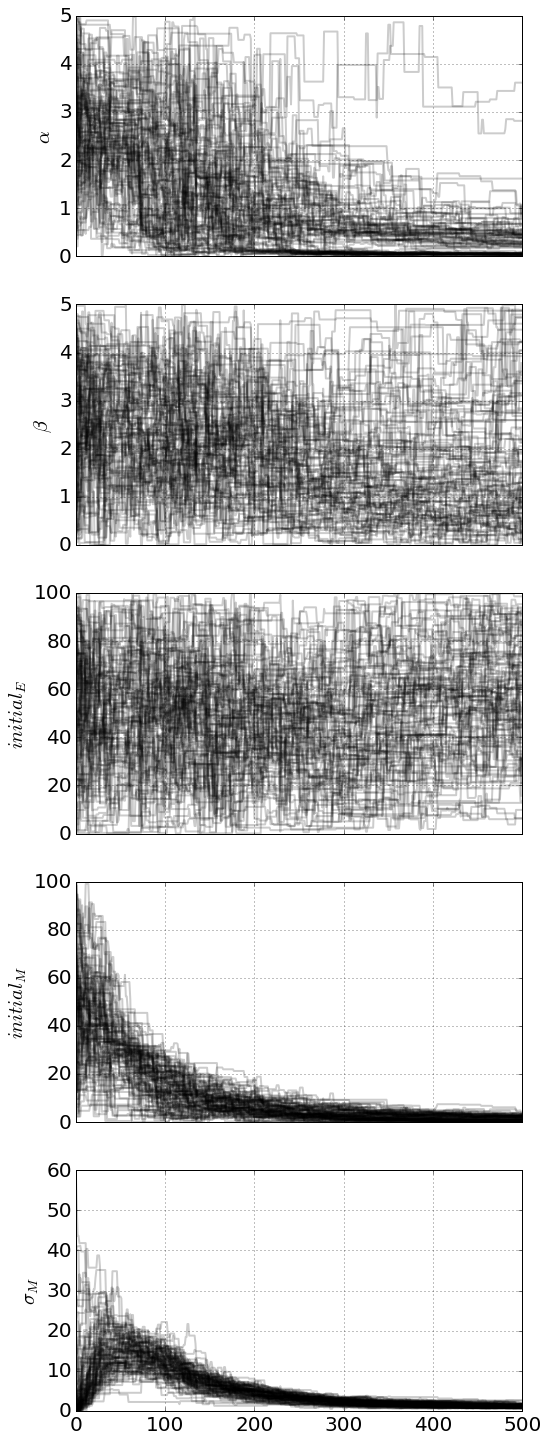

In [51]:
model=MCMCModel(sim,
                alpha=Uniform(0,5),
                beta=Uniform(0,5),
               initial_M=Uniform(0,100),
               initial_E=Uniform(0,100),
               )
model.run_mcmc(500)
model.plot_chains()

Running MCMC...
Done.
1 m, 57.98 s


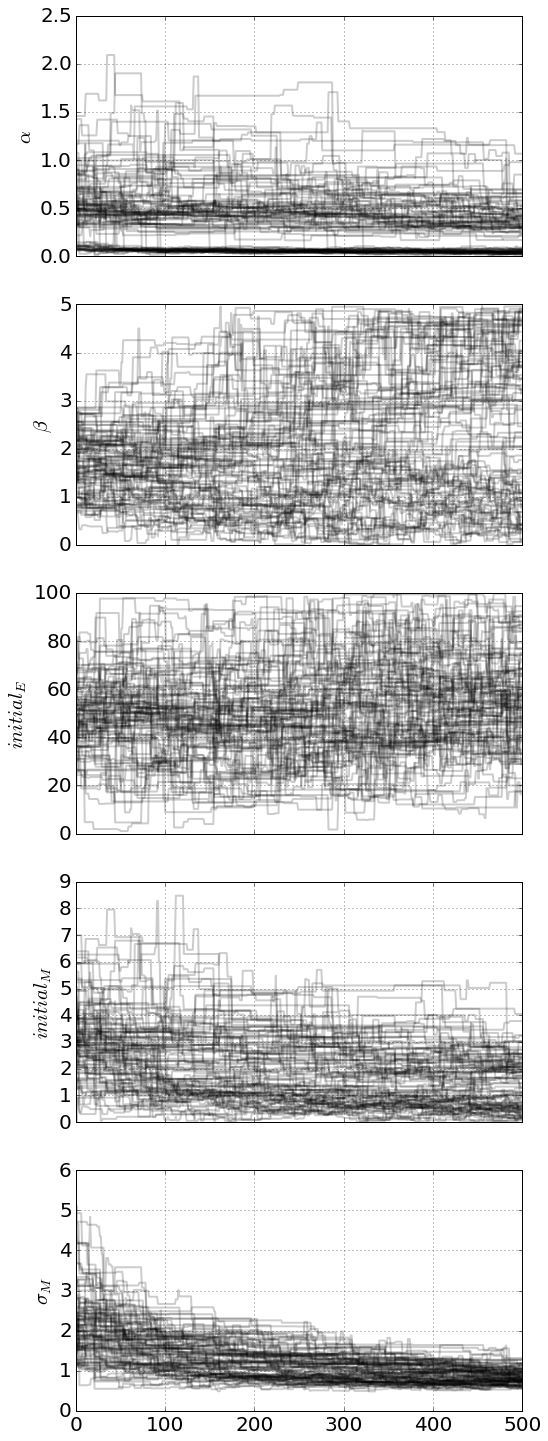

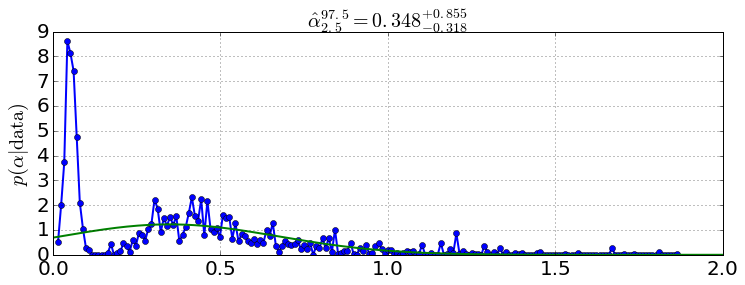

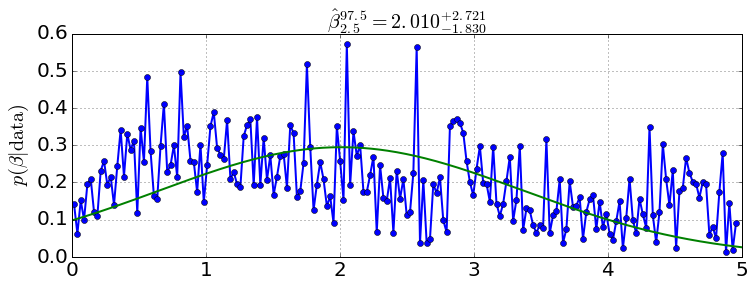

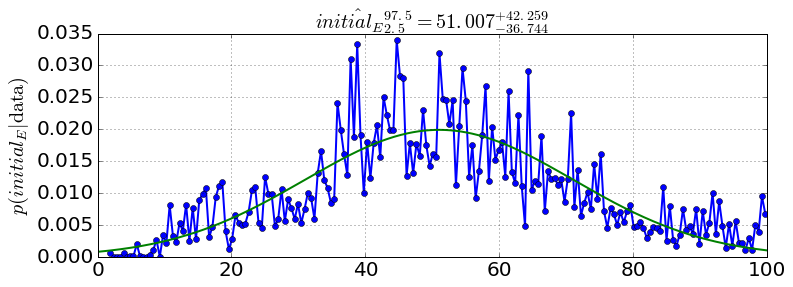

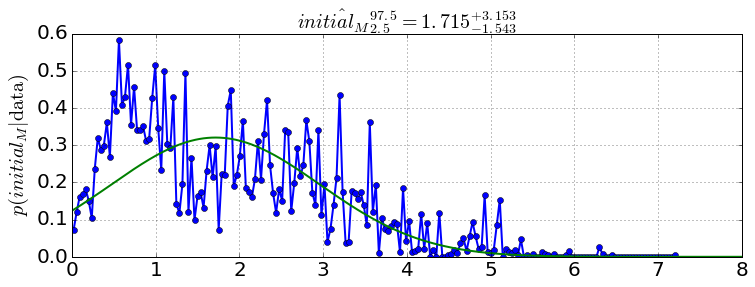

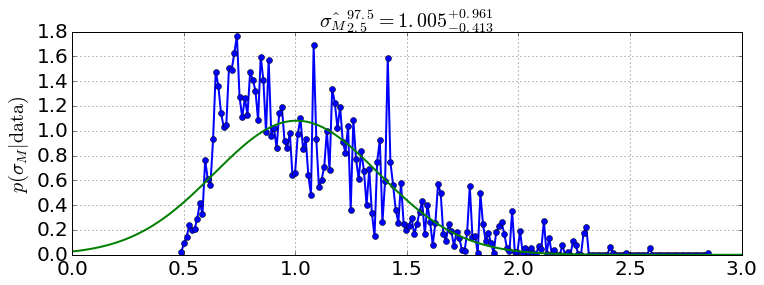

In [52]:
model.set_initial_values('samples')
model.run_mcmc(500)
model.plot_chains()
model.plot_distributions()

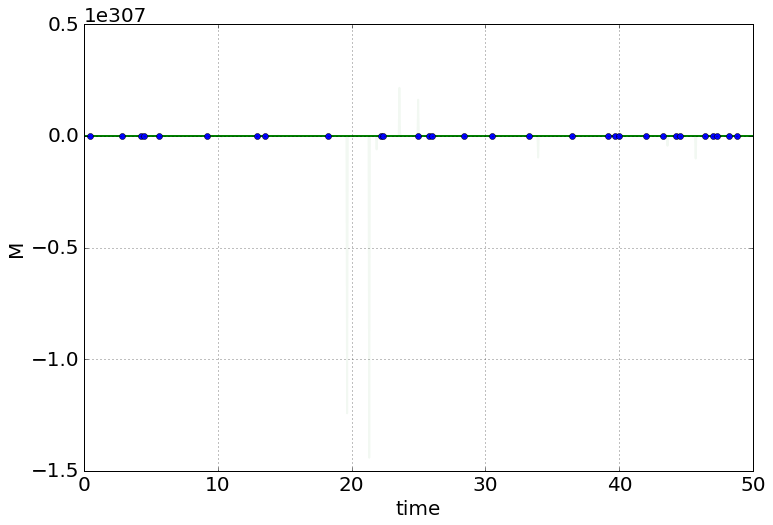

In [53]:
model.plot_many(0,50,'M')

## Try with the lotka voltera

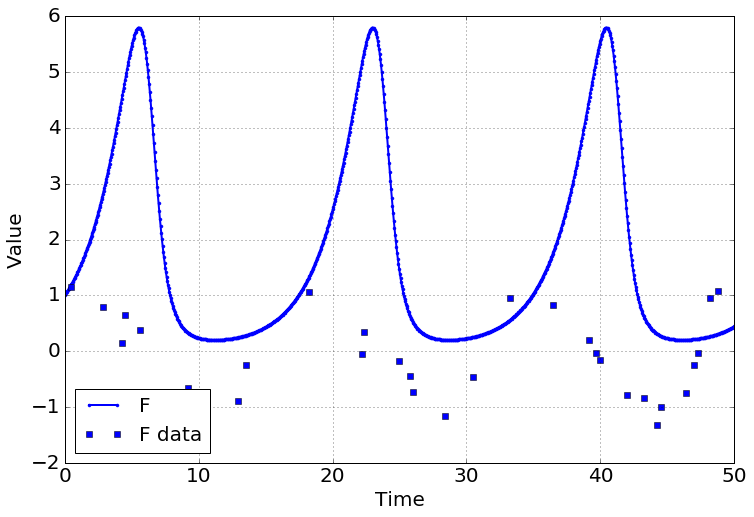

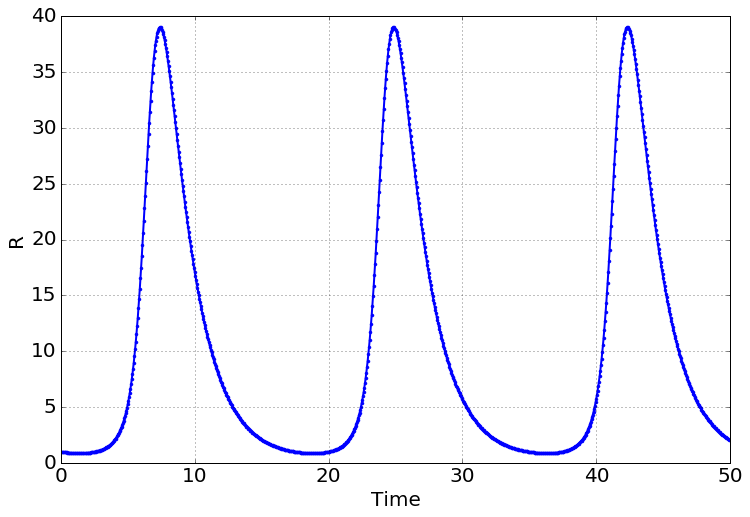

In [55]:
sim=Simulation()
sim.add("F'=alpha*F-beta*F*R",1,plot=True)
sim.add("R'=-gamma*R+delta*F*R",1,plot=True)
sim.add_data(t=t_data,F=M_data,plot=True)
sim.params(alpha=.4,beta=0.04,gamma=0.5,delta=.3)
sim.run(0,50)

Sampling Prior...
Done.
0.46 s
Running MCMC...
Done.
5 m, 2.62 s


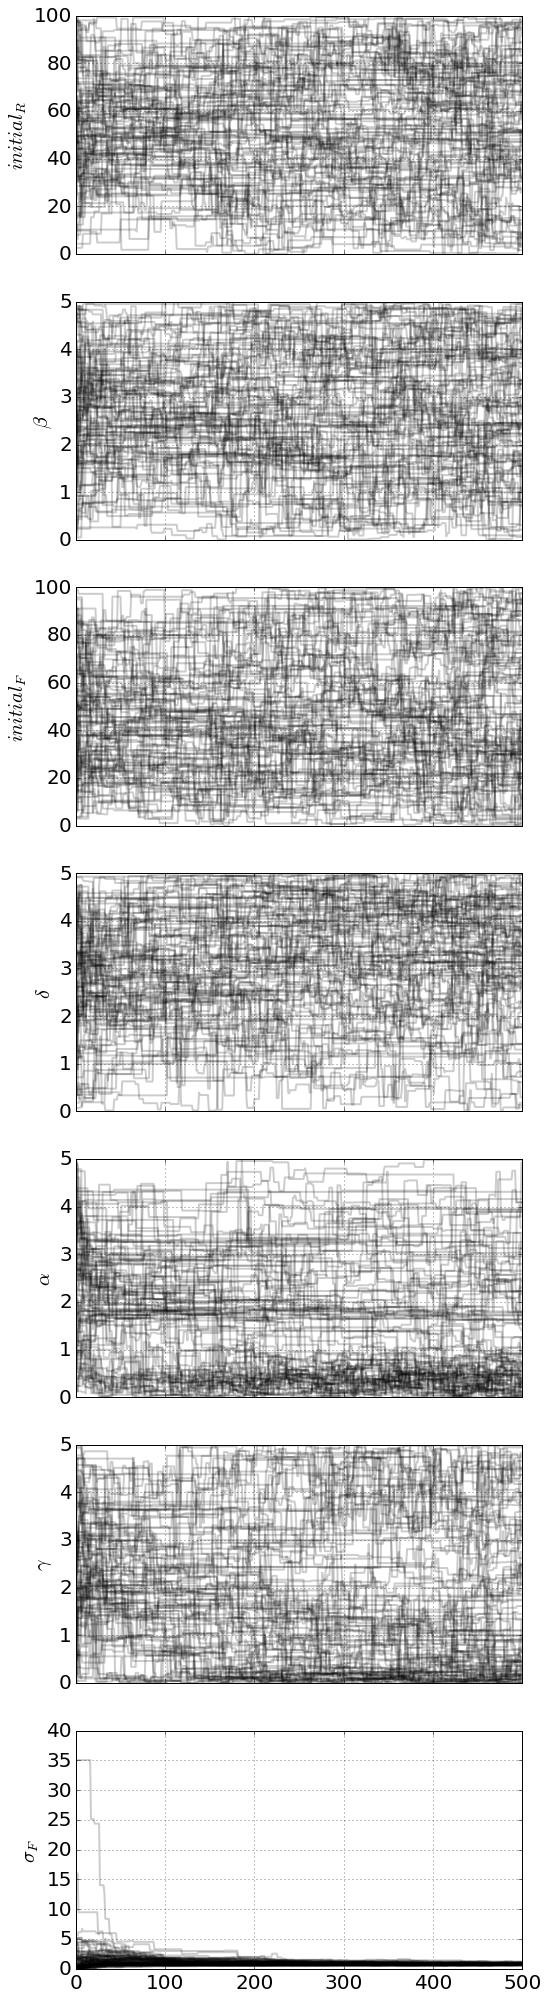

In [56]:
model=MCMCModel(sim,
                alpha=Uniform(0,5),
                beta=Uniform(0,5),
                delta=Uniform(0,5),
                gamma=Uniform(0,5),
               initial_F=Uniform(0,100),
               initial_R=Uniform(0,100),
               )
model.run_mcmc(500)
model.plot_chains()

Running MCMC...
Done.
3 m, 18.16 s


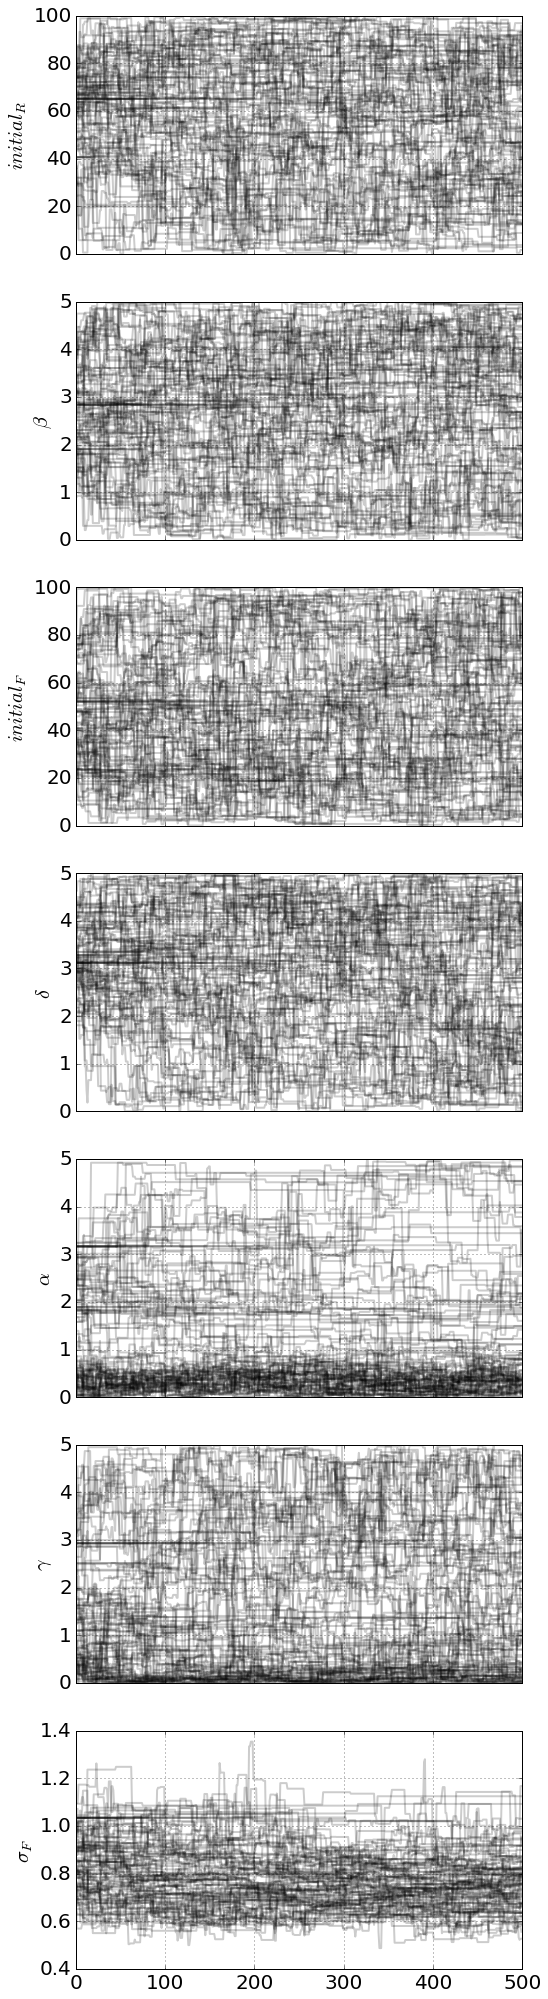

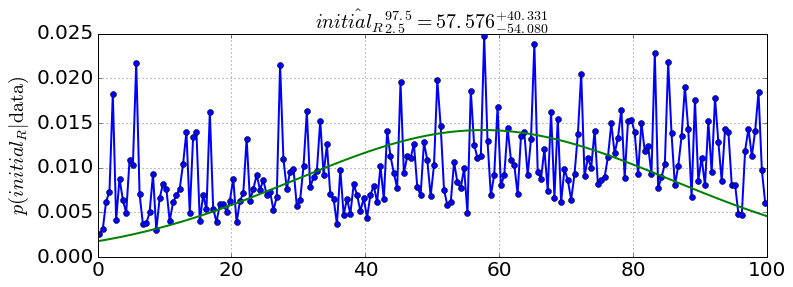

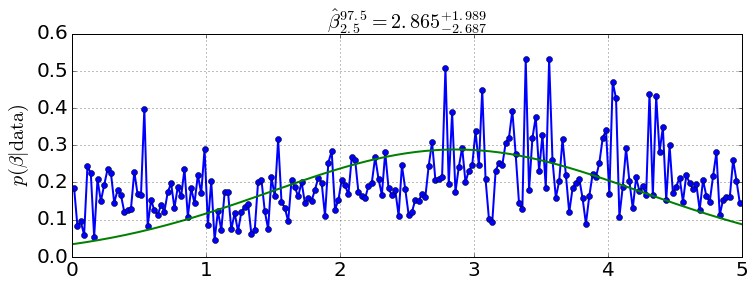

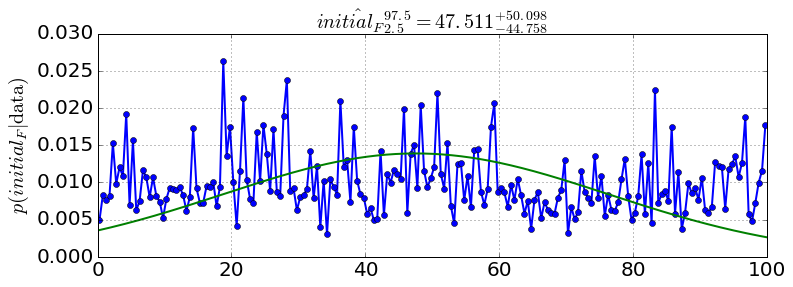

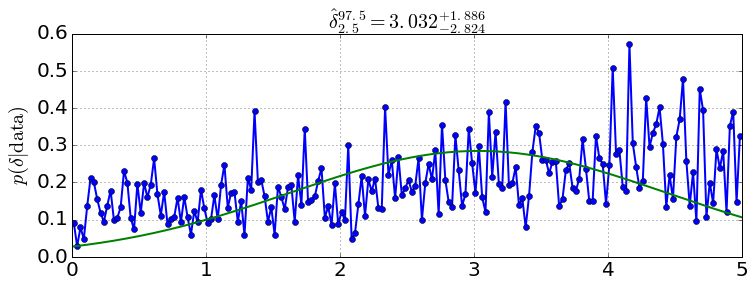

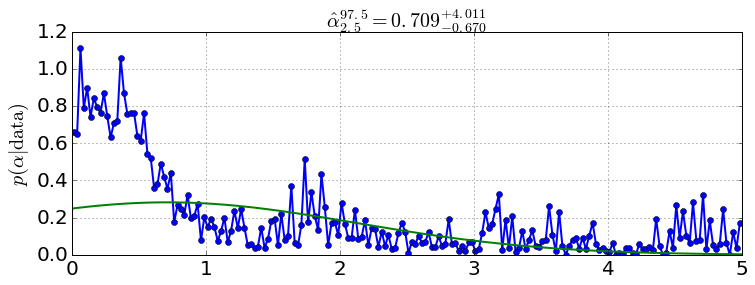

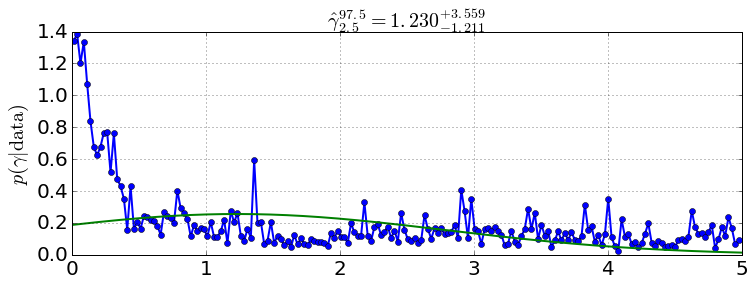

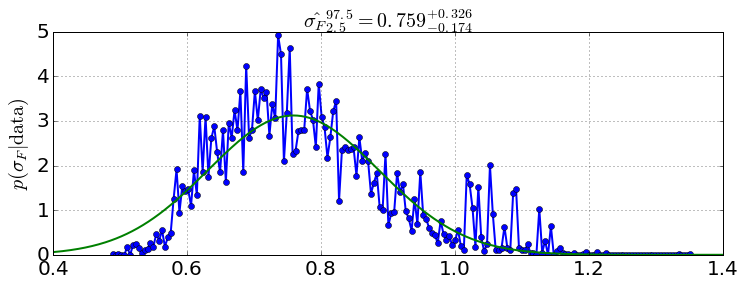

In [57]:
model.set_initial_values('samples')
model.run_mcmc(500)
model.plot_chains()
model.plot_distributions()

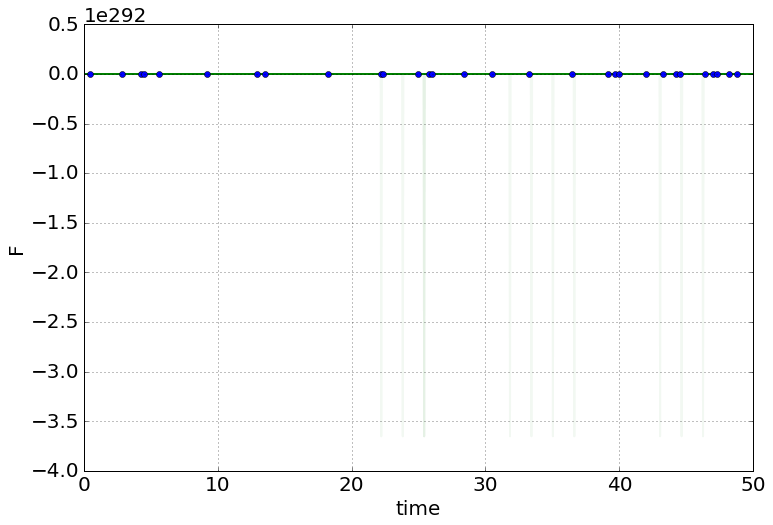

In [58]:
model.plot_many(0,50,'F')